<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">Descriptive Statistics<h1>
  <h4 align="center">Obesity rates dataset</h4>
</p>

---

## Introduction
This notebook is the result of the practice carried out in the course ["Curso de Matemáticas para Data Science: Estadística Descriptiva"](https://platzi.com/cursos/estadistica-descriptiva/), where the Dataset "ObesityDataSet_raw_and_data_synthetic" was used evaluates obesity rates in individuals from Colombia, Peru and Mexico.

The purpose of the project is to put into practice the concepts of descriptive statistics focused on data science, through the following workflow:

- Development
  - Data types and description
  - Null Data Review
- Statistical analysis
  - Measures of central tendency
  - Measures of dispersion
- Measures of dispersion
  - Standard deviation:
  - Range and quartiles
- Outlier detection
- Linear scaling of numerical variables
  - Linear scaling min-max
  - Z-score scaling
- Nonlinear scaling of numerical variables
- Scaling of categorical variables
  - One-hot scaling
  - One-hot with Scikit learn
  - One-hot with pandas "dummies" method

For more information share the notes in Notion of the course with more functions [View site ](https://aluminum-carbon-41d.notion.site/C-Matem-ticas-para-DS-Estad-stica-Descriptiva-174aa85e176e446eb82e00618f5877ff?pvs=4)

## Data
The Data set ["ObesityDataSet_raw_and_data_synthetic"](https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels/code) of kaggel contains indices of obesity based on eating habits & physical cond

**Columns**

*Feeding Habits*

* Frequent consumption of high-calorie foods (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Daily water consumption (CH20)
* Alcohol consumption (CALC).

*Physical condition*
* Monitoring calorie consumption (SCC),
* Frequency of physical activity (FAF),
* Time using technological devices (TUE),
* Transportation used (MTRANS),

___


## Development
### Importing Libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


print('Imported libraries')

Imported libraries


### Import the dataset

In [144]:
df = pd.read_csv("../data/life_expectancy.csv")
df.sample(5)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
1766,Bhutan,BTN,South Asia,Lower middle income,2011,68.840000,NaN,589.999974,3.349218,4.76523,3.230,4.5,64.297532,21520.01,87773.12,121917.53
3163,Chile,CHL,Latin America & Caribbean,High income,2019,80.181000,2.6,91370.002747,9.332724,NaN,7.290,NaN,77.152274,517285.68,289529.01,3710127.51
2337,Iceland,ISL,Europe & Central Asia,High income,2014,82.860976,2.5,2049.999952,8.228889,7.64141,4.900,NaN,71.592721,6238.05,3144.46,61639.13
1316,Maldives,MDV,South Asia,Upper middle income,2008,75.073000,NaN,870.000005,11.471042,4.47029,11.056,2.5,NaN,5969.90,16751.01,44464.08
2973,Burkina Faso,BFA,Sub-Saharan Africa,Low income,2018,61.174000,12.7,4670.000076,4.909887,5.48861,4.690,3.5,NaN,982292.59,9144973.44,4134304.64


### Understanding the data

In [145]:
df.shape

(3306, 16)

The variables with the greatest number of Null values in order:
- Corruption
- Sanitation
- Education Expenditure %
- Prevelance of Undernourishment

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

Since linear regressions are performed with correlated variables, it is necessary to see the correlations between the variables

<Axes: >

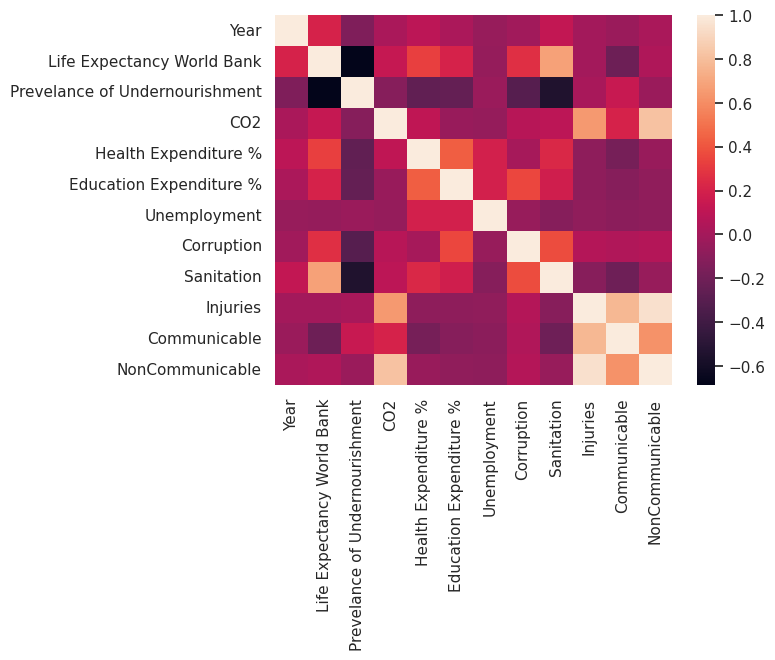

In [147]:
# Numerical variables
colum_num = df.select_dtypes(include=['int64', 'float64']).columns

sns.set(style = "whitegrid", context = "notebook")
sns.heatmap(df[colum_num].corr(), cbar = True)

The variables with the highest correlation:
- Prevalence of Undernourishment
- Life Expectancy World Bank

<Axes: xlabel='Prevelance of Undernourishment', ylabel='Life Expectancy World Bank'>

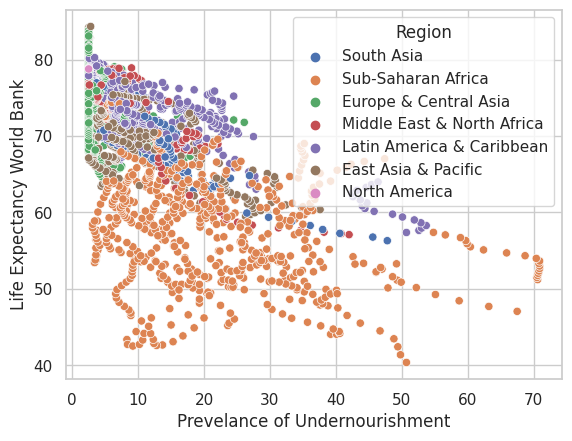

In [148]:
sns.scatterplot(data=df, x=df["Prevelance of Undernourishment"], y=df["Life Expectancy World Bank"], hue = df["Region"] )

___
### Simple linear regression

In [149]:
df["Prevelance of Undernourishment"].isnull().sum()

684

In [150]:
df["Life Expectancy World Bank"].isnull().sum()

188

#### Adjust null values
Replacing the null values with the mean of each variable segmented by the "region" variable, avoiding increasing the bias of the variables

In [156]:
df_2 = df.copy()

mean_undernourishment_by_region = df_2.groupby("Region")["Prevelance of Undernourishment"].transform("mean")
df_2["Prevelance of Undernourishment"].fillna(mean_undernourishment_by_region, inplace = True)
df_2["Prevelance of Undernourishment"].isnull().sum()

0

In [158]:
mean_life_expectancy = df_2.groupby("Region")["Life Expectancy World Bank"].transform("mean")
df_2["Life Expectancy World Bank"].fillna(mean_life_expectancy, inplace = True)
df_2["Life Expectancy World Bank"].isnull().sum()

0

In [159]:
X_col = df_2[["Prevelance of Undernourishment"]]
y_col = df_2[["Life Expectancy World Bank"]]
X_col.shape

(3306, 1)


Split training and test data

In [154]:
X_train, X_test, y_train, y_test =  train_test_split(X_col, y_col)

Standardize data

In [155]:
X_col = X_col.values.reshape(-1, 1)  # Convierte a una matriz 2D
y_col = y_col.values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()


sc_x.fit(X_col)
sc_y.fit(y_col)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


/home/williamccs/miniconda3/envs/cookiecutter-personal/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/williamccs/miniconda3/envs/cookiecutter-personal/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/williamccs/miniconda3/envs/cookiecutter-personal/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/williamccs/miniconda3/envs/cookiecutter-personal/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [161]:
print("X_train: {}".format(X_train.shape[0]),
      "X_test: {}".format(X_test.shape[0]), sep = "\n")

X_train: 2479
X_test: 827


### Create the model

In [162]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions

In [165]:
y_pred = model.predict(X_test)
y_pred.shape

(827, 1)